In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
divar_df = pd.read_csv('../datasets/Divar.csv')

/tmp/ipykernel_2461/1278108169.py:1: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  divar_df = pd.read_csv('../datasets/Divar.csv')


### Overview

In [14]:
divar_df.head()

,Unnamed: 0,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,...,property_type,regular_person_capacity,extra_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius
0,0,temporary-rent,villa,karaj,mehrshahr,2024-08-01 00:00:00,مشاور املاک,۵۰۰متر\n۲۰۰متر بنا دوبلکس\n۳خواب\nاستخر آبگرم ...,باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه,NaN,...,NaN,4.0,6,350000.0,1500000.0,3.500000e+09,3500000.0,35.811684,50.936600,500.0
1,1,residential-sell,apartment-sell,tehran,gholhak,2024-05-01 00:00:00,مشاور املاک,دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...,۶۰ متر قلهک فول امکانات,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0
2,2,residential-rent,apartment-rent,tehran,tohid,2024-10-01 00:00:00,NaN,تخلیه پایان ماه,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.703865,51.373459,NaN
3,3,commercial-rent,office-rent,tehran,elahiyeh,2024-06-01 00:00:00,NaN,فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,residential-sell,apartment-sell,mashhad,emamreza,2024-05-01 00:00:00,مشاور املاک,هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...,۱۱۵ متری/شمالی رو به آفتاب/اکبری,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
divar_df[['cat2_slug', 'cat3_slug', 'city_slug', 'neighborhood_slug', 'property_type']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   cat2_slug          1000000 non-null  object
 1   cat3_slug          999999 non-null   object
 2   city_slug          999998 non-null   object
 3   neighborhood_slug  437139 non-null   object
 4   property_type      27057 non-null    object
dtypes: object(5)
memory usage: 38.1+ MB


In [16]:
for col in ['cat2_slug', 'cat3_slug', 'property_type'] :
    print(col, ':')
    print(divar_df[col].unique(), '\n')

cat2_slug :
['temporary-rent' 'residential-sell' 'residential-rent' 'commercial-rent'
 'commercial-sell' 'real-estate-services'] 

cat3_slug :
['villa' 'apartment-sell' 'apartment-rent' 'office-rent' 'shop-sell'
 'plot-old' 'house-villa-sell' 'house-villa-rent' 'shop-rent'
 'industry-agriculture-business-rent' 'office-sell'
 'industry-agriculture-business-sell' 'presell' 'suite-apartment'
 'partnership' 'workspace' nan] 

property_type :
[nan 'jungle' 'other' 'beach' 'jungle-mountain' 'mountain'] 



In [17]:
divar_df['neighborhood_slug'].nunique()

1188

In [18]:
divar_df[['has_balcony', 'has_elevator', 'has_warehouse', 'has_parking', 'construction_year', 'is_rebuilt']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   has_balcony        506411 non-null  object
 1   has_elevator       541749 non-null  object
 2   has_warehouse      728155 non-null  object
 3   has_parking        728156 non-null  object
 4   construction_year  815828 non-null  object
 5   is_rebuilt         529470 non-null  object
dtypes: object(6)
memory usage: 45.8+ MB


In [19]:
divar_df[['land_size', 'building_size', 'deed_type', 'floor', 'rooms_count', 'total_floors_count', 'unit_per_floor']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   land_size           186396 non-null  float64
 1   building_size       980394 non-null  float64
 2   deed_type           253458 non-null  object 
 3   floor               541748 non-null  object 
 4   rooms_count         845899 non-null  object 
 5   total_floors_count  304352 non-null  object 
 6   unit_per_floor      302283 non-null  object 
dtypes: float64(2), object(5)
memory usage: 53.4+ MB


### filling neighborhood_slug's missing values

In [3]:
for city in divar_df['city_slug'].unique() :
    df = divar_df[divar_df['city_slug'] == city]['neighborhood_slug']
    print(f'{city} : ' , df.isnull().sum(), len(df))

karaj :  0 49367
tehran :  0 190904
mashhad :  0 69032
ahvaz :  0 19590
kermanshah :  17048 17048
mahdasht-city :  1907 1907
pardis-city :  11396 11396
foolad-shahr :  1634 1634
rasht :  0 16833
mahabad :  434 434
shiraz :  0 37141
gonabad :  322 322
azna :  555 555
andisheh-new-town :  20847 20847
chamestan :  7714 7714
babol :  1374 1374
arak :  10878 10878
pishva :  1018 1018
tabriz :  27655 27655
urmia :  13466 13466
nur :  7241 7241
kish :  4577 4577
nasimshahr :  1988 1988
amol :  3272 3272
yasuj :  4920 4920
isfahan :  0 36953
ilam :  3303 3303
najafabad :  3586 3586
yazd :  9310 9310
pakdasht-city :  4326 4326
bandar-ganaveh :  1120 1120
chalus :  1981 1981
sabzevar :  2969 2969
eslamshahr :  7988 7988
dezful :  4960 4960
mohammadieh :  1772 1772
lavasan-city :  824 824
sirjan :  3089 3089
Kordkuy :  435 435
hamedan :  9877 9877
qods-city :  4683 4683
shandiz-city :  720 720
mahmudabad :  4991 4991
aran-va-bidgol :  429 429
bandar-abbas :  11555 11555
bandar-kangan :  1313 1313

In [4]:
for city in divar_df['city_slug'].unique() :
    df = divar_df[divar_df['city_slug'] == city]['neighborhood_slug']
    if (df.isnull().sum() != 0) and (df.isnull().sum() != len(df)) :
        print(f'{city} : ' , df.isnull().sum(), len(df))

talesh :  1293 1353
lahijan :  4018 4089
bandar-anzali :  3738 3817


In [5]:
# از کد قبلی متوجه شدیم که شهر های بزرگتر دیتای محله کاملی دارند ولی شهر های کوچکتر دیتای محله آنها تقریبا خالی است
# حالا به پر کردن missing value ها میپردازیم

for city in divar_df['city_slug'].unique() :
    df = divar_df[divar_df['city_slug'] == city]['neighborhood_slug']
    if (df.isnull().sum() != 0) and (df.isnull().sum() == len(df)):
        divar_df.loc[divar_df['city_slug'] == city, 'neighborhood_slug'] = city

In [6]:
for city in ['lahijan', 'talesh', 'bandar-anzali'] :
    divar_df.loc[(divar_df['city_slug'] == city) & (divar_df['neighborhood_slug'].isna()), 'neighborhood_slug'] = city

### filling building_size's missing values

In [7]:
for cat3 in divar_df['cat3_slug'].unique() :
    df = divar_df[divar_df['cat3_slug'] == cat3]['building_size']
    print(f'{cat3} : ' , df.isnull().sum(), len(df))

villa :  1 12899
apartment-sell :  5 303385
apartment-rent :  13 211880
office-rent :  70 21418
shop-sell :  11 21855
plot-old :  11 133570
house-villa-sell :  15 121753
house-villa-rent :  11 64678
shop-rent :  30 45993
industry-agriculture-business-rent :  15 9155
office-sell :  0 5155
industry-agriculture-business-sell :  19 11851
presell :  15776 15781
suite-apartment :  4 16465
partnership :  3621 3622
workspace :  4 539
nan :  0 0


In [8]:
divar_df[divar_df['cat3_slug'] == 'presell']['cat2_slug'].value_counts()

cat2_slug
real-estate-services    15781
Name: count, dtype: int64

In [9]:
divar_df[divar_df['cat3_slug'] == 'presell'][['price_value', 'rent_value', 'credit_value']].isnull().sum()

price_value     14577
rent_value      15779
credit_value    15779
dtype: int64

In [10]:
# میشود مقادیر خالی را با title و description با کمک nlp پر کرد
divar_df[divar_df['cat3_slug'] == 'presell'][['title', 'description']]

,title,description
125,۸۰ متر نو سازخیابان سعدی/ملارد/سراسیاب/املاک م...,۸۰ متر نوساز کلید نخورده\n✅دوخواب\n✅روب نما\n✅...
127,64متری پیش فروش واوان,پیش فروش آپارتمان✅\n\nمحدوده: واوان✓هشت بهشت✅\...
243,۸۵ متر الهیه پیش فروش,سلام احترام \nواحد ۸۵ متری سر جلو \nآفتابگیر \...
435,فروش آپارتمان دو خوابه فاز ۱ صدرا,پیش فروش آپارتمان دو خوابه فاز ۱ سند ملکی\nموق...
492,پیشفروش تجاری+اداری از۳متربطوراقساط قطعی/المپی...,آیا به دنبال یک سرمایه‌گذاری پرسود و آینده‌دار...
...,...,...
999584,مسکن ملی,فیش مسکن ملی با پرداخت کامل میهام .\n\nفیش با ...
999605,پیش فروش واحد ۱۰۰ متری دبیران,✅آپارتمان ۱۰۰ متری\n✅دو خواب\n✅۴ طبقه ۸ واحد\n...
999642,آپارتمان ۲۹۰ متری .پونک,درود بر شما\nپیش فروش ساختمان ‌سوپر لوکس با سا...
999852,پیش فروش ۱۰۰ متری دو خوابه,رو به نما\nبولوار قلنبر خیابان مسجد طالقانی\nت...


In [11]:
# باتوجه به اینکه آگهی های پیش خرید  نه قیمت مشخصی دارند و نه متراژ تصمیم به حذف آنها میگیرم
# حالا بقیه مقادیر گمشده را با توجه به cat3 پر میکنم

divar_df = divar_df[divar_df['cat3_slug'] != 'presell']
for cat3 in divar_df['cat3_slug'].unique() :
    mean = np.round(np.nanmean(divar_df[divar_df['cat3_slug'] == cat3]['building_size'].to_numpy()))
    divar_df.loc[(divar_df['cat3_slug'] == cat3) & (divar_df['building_size'].isna()), 'building_size'] = mean

/tmp/ipykernel_2461/3916491908.py:6: RuntimeWarning: Mean of empty slice
  mean = np.round(np.nanmean(divar_df[divar_df['cat3_slug'] == cat3]['building_size'].to_numpy()))


### filling floor's missing values

In [12]:
divar_df['floor'].unique()

array([nan, '3', '4', '2', '1', '5', '0', '30', '6', '7', '8', '18', '12',
       '11', '10', '-1', '13', '9', '19', '16', '30+', '21', '15', '22',
       '14', '17', '20', '23', '25', '24', '26', '28', '29', '27', 3.0,
       2.0, 4.0, 1.0, 0.0, 20.0, 5.0, 7.0, 6.0, 18.0, 8.0, -1.0, 22.0,
       10.0, 14.0, 9.0, 11.0], dtype=object)

In [13]:
divar_df['floor'] = divar_df['floor'].apply(lambda x: np.float64(30) if x == '30+' else np.float64(x))

In [14]:
for cat3 in divar_df['cat3_slug'].unique() :
    df = divar_df[divar_df['cat3_slug'] == cat3]['floor']
    print(f'{cat3} : ' , df.isnull().sum(), len(df))

villa :  12899 12899
apartment-sell :  8 303385
apartment-rent :  13 211880
office-rent :  70 21418
shop-sell :  21855 21855
plot-old :  133570 133570
house-villa-sell :  121753 121753
house-villa-rent :  64678 64678
shop-rent :  45993 45993
industry-agriculture-business-rent :  9155 9155
office-sell :  0 5155
industry-agriculture-business-sell :  11850 11851
suite-apartment :  16465 16465
partnership :  3622 3622
workspace :  539 539
nan :  0 0


In [15]:
divar_df[divar_df['cat3_slug'] == 'industry-agriculture-business-sell']['floor'].value_counts()

floor
2.0    1
Name: count, dtype: int64

In [16]:
# چون مقدار کد بالا یک بود مقادیر گمشده را چون همگی در یک طبقه هستیند بجای 0 با 1 پر میکنیم
for cat3 in divar_df['cat3_slug'].unique() :
    if divar_df[divar_df['cat3_slug'] == cat3]['floor'].isnull().sum() > 100 :
        divar_df.loc[(divar_df['cat3_slug'] == cat3) & (divar_df['floor'].isna()), 'floor'] = 1
    else :
        mean = np.round(np.nanmean(divar_df[divar_df['cat3_slug'] == cat3]['floor'].to_numpy()))
        divar_df.loc[(divar_df['cat3_slug'] == cat3) & (divar_df['floor'].isna()), 'floor'] = mean

/tmp/ipykernel_2461/3412161687.py:6: RuntimeWarning: Mean of empty slice
  mean = np.round(np.nanmean(divar_df[divar_df['cat3_slug'] == cat3]['floor'].to_numpy()))


### filling rooms_count's missing values

In [17]:
for cat3 in divar_df['cat3_slug'].unique() :
    df = divar_df[divar_df['cat3_slug'] == cat3]['rooms_count']
    print(f'{cat3} : ' , df.isnull().sum(), len(df))

villa :  1 12899
apartment-sell :  6 303385
apartment-rent :  13 211880
office-rent :  70 21418
shop-sell :  11 21855
plot-old :  133569 133570
house-villa-sell :  15 121753
house-villa-rent :  11 64678
shop-rent :  30 45993
industry-agriculture-business-rent :  382 9155
office-sell :  0 5155
industry-agriculture-business-sell :  581 11851
suite-apartment :  4 16465
partnership :  3622 3622
workspace :  4 539
nan :  0 0


In [18]:
divar_df[divar_df['cat3_slug'] == 'plot-old']['floor'].value_counts()

floor
1.0    133570
Name: count, dtype: int64

In [19]:
divar_df[divar_df['cat3_slug'] == 'partnership']['floor'].value_counts()

floor
1.0    3622
Name: count, dtype: int64

In [20]:
divar_df['rooms_count'].value_counts()

rooms_count
دو              404050
یک              192083
سه              138633
بدون اتاق        75898
چهار             21371
پنج یا بیشتر     13864
Name: count, dtype: int64

In [21]:
def rooms_counts_convertor(rooms_count) :
    if rooms_count == 'یک' :
        return 1
    elif rooms_count == 'دو' :
        return 2
    elif rooms_count == 'سه' :
        return 3
    elif rooms_count == 'چهار' :
        return 4
    elif rooms_count == 'پنج یا بیشتر' :
        return 5
    elif rooms_count == 'بدون اتاق' :
        return 0
    
divar_df['rooms_count'] = divar_df['rooms_count'].apply(lambda x: rooms_counts_convertor(x))

In [22]:
for cat3 in divar_df['cat3_slug'].unique() :
    if divar_df[divar_df['cat3_slug'] == cat3]['rooms_count'].isnull().sum() > 100 :
        divar_df.loc[(divar_df['cat3_slug'] == cat3) & (divar_df['rooms_count'].isna()), 'rooms_count'] = 0
    else :
        mean = np.round(np.nanmean(divar_df[divar_df['cat3_slug'] == cat3]['rooms_count'].to_numpy()))
        divar_df.loc[(divar_df['cat3_slug'] == cat3) & (divar_df['rooms_count'].isna()), 'rooms_count'] = mean

/tmp/ipykernel_2461/1088937509.py:5: RuntimeWarning: Mean of empty slice
  mean = np.round(np.nanmean(divar_df[divar_df['cat3_slug'] == cat3]['rooms_count'].to_numpy()))


### final_price

In [23]:
# محسابه قیمت اصلی از اجاره و رهن و قیمت فروش
divar_df['final_price'] = np.where(divar_df['price_value'].notna(), divar_df['price_value'],
    np.where((divar_df['transformable_credit'].notna()) | (divar_df['transformable_rent'].notna()),
        ((divar_df['transformable_credit'].fillna(0) * 30000) / 1000000) + divar_df['transformable_rent'].fillna(0), np.nan)
            )

### filling construction_year's missing values

In [ ]:
divar_df['construction_year'].info()

<class 'pandas.core.series.Series'>
Index: 984219 entries, 0 to 999999
Series name: construction_year
Non-Null Count   Dtype 
--------------   ----- 
815828 non-null  object
dtypes: object(1)
memory usage: 15.0+ MB


In [ ]:
divar_df['construction_year'].unique()

array([nan, '۱۳۸۴', '۱۴۰۱', '۱۴۰۰', '۱۴۰۳', '۱۳۸۹', '۱۳۹۵', '۱۳۹۳',
       '۱۳۹۶', '۱۳۸۷', '۱۳۸۵', '۱۳۹۰', '۱۳۹۸', '۱۴۰۲', '۱۳۸۸',
       'قبل از ۱۳۷۰', '۱۳۹۲', '۱۳۸۳', '۱۳۹۴', '۱۳۹۱', '۱۳۸۰', '۱۳۷۸',
       '۱۳۷۵', '۱۳۹۷', '۱۳۹۹', '۱۳۸۲', '۱۳۸۶', '۱۳۷۹', '۱۳۷۲', '۱۳۷۴',
       '۱۳۷۶', '۱۳۷۷', '۱۳۷۱', '۱۳۸۱', '۱۳۷۳'], dtype=object)

In [ ]:
divar_df['construction_year'] = divar_df['construction_year'].apply(lambda x: np.float64(1370) if x == 'قبل از ۱۳۷۰' else np.float64(x))

In [ ]:
for cat3 in divar_df['cat3_slug'].unique() :
    df = divar_df[divar_df['cat3_slug'] == cat3]['construction_year']
    print(f'{cat3} : ' , df.isnull().sum(), len(df))

villa :  12899 12899
apartment-sell :  5 303385
apartment-rent :  13 211880
office-rent :  70 21418
shop-sell :  11 21855
plot-old :  133569 133570
house-villa-sell :  15 121753
house-villa-rent :  11 64678
shop-rent :  30 45993
industry-agriculture-business-rent :  478 9155
office-sell :  0 5155
industry-agriculture-business-sell :  663 11851
suite-apartment :  16465 16465
partnership :  3622 3622
workspace :  539 539
nan :  0 0


In [ ]:
for cat2 in divar_df['cat2_slug'].unique() :
    df = divar_df[divar_df['cat2_slug'] == cat2]['construction_year']
    print(f'{cat2} : ' , df.isnull().sum(), len(df))

temporary-rent :  29903 29903
residential-sell :  133589 558708
residential-rent :  24 276558
commercial-rent :  579 76567
commercial-sell :  674 38861
real-estate-services :  3622 3622


In [ ]:
divar_df[divar_df['cat3_slug'] == 'suite-apartment']['cat2_slug'].value_counts()

cat2_slug
temporary-rent    16465
Name: count, dtype: int64

In [ ]:
divar_df[divar_df['cat3_slug'] == 'partnership']['cat2_slug'].value_counts()

cat2_slug
real-estate-services    3622
Name: count, dtype: int64

In [ ]:
divar_df[divar_df['cat3_slug'] == 'workspace']['cat2_slug'].value_counts()

cat2_slug
temporary-rent    539
Name: count, dtype: int64

In [ ]:
divar_df[divar_df['cat3_slug'] == 'villa']['cat2_slug'].value_counts()

cat2_slug
temporary-rent    12899
Name: count, dtype: int64

In [ ]:
# از اونجایی که plot-old ها زمین های تخریبی هستند پس سال ساخت ندارند
divar_df.loc[divar_df['cat3_slug'] == 'plot-old', 'construction_year'] = -1

(16465,) (12899,)


ValueError: x and y must be the same size

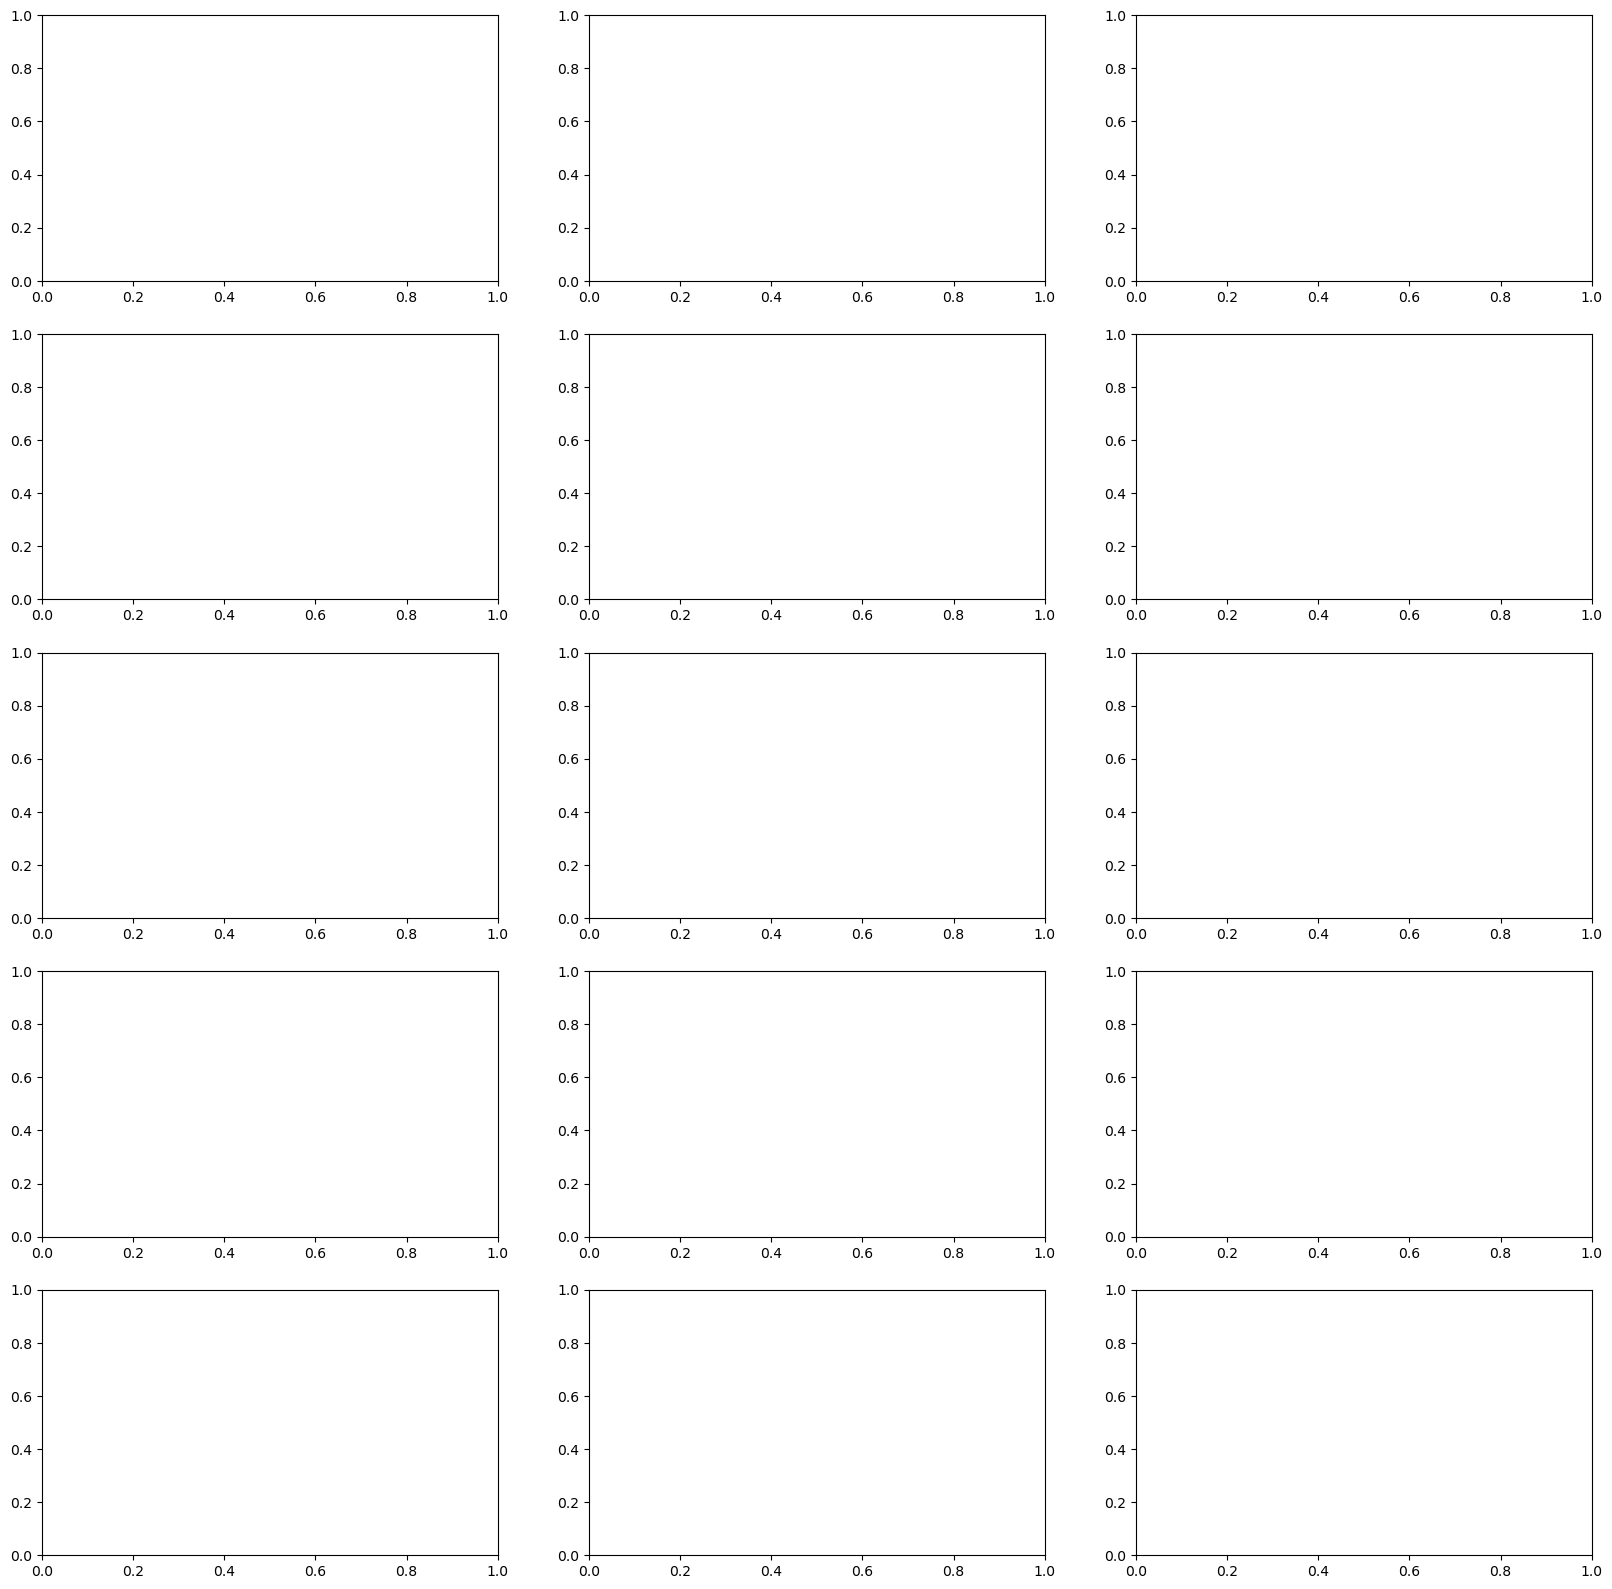

In [ ]:
# اول چک کن که چه چیزی کوریلیشنش با سال ساخت بیشتره بعد ببین کدومو یک از کت 3 سلاگ ها با هر کدوم از تمام نال ها یکی ترن

figure, axes = plt.subplots(5, 3, figsize=(20, 20))
axes = axes.flatten()

for i, cat3 in enumerate(divar_df['cat3_slug'].unique()) :
    if i == 15: break
    suite_apartment_df = divar_df[divar_df['cat3_slug'] == 'suite-apartment']['construction_year']
    cat3_df = divar_df[divar_df['cat3_slug'] == cat3]['construction_year']
    suite_apartment_df.rename({ 'construction_year', 'construction_year_suite_apartment' }, axis=1)
    cat3_df.rename({ 'construction_year', f'construction_year_{cat3}' }, axis=1)
    
    df = 
    
    axes[i].scatter(suite_apartment_df, cat3_df)
    axes[i].set_title(cat3_df)

In [ ]:
# برای پر کردن داده های گمشده suite-apartment از میانگین apartemant-rent و sell استفاده میکنیم چون همگی آپارتمان هستند
mean = np.round(np.nanmean(
    divar_df[(divar_df['cat3_slug'] == 'apartment-rent')]['construction_year'].to_numpy()
))
divar_df.loc[divar_df['cat3_slug'] == 'suite-apartment', 'construction_year'] = mean

In [ ]:
for construction_year in sorted(divar_df['construction_year'].unique()) :
    df = divar_df[divar_df['construction_year'] == construction_year]['final_price']
    print(f'{construction_year} : ' , df.isnull().sum(), len(df))
    
# بیشتر مقدار گمشده final_price هم در plot-old هست

nan :  0 0
-1.0 :  23734 133570
1370.0 :  838 20637
1371.0 :  112 5531
1372.0 :  34 1914
1373.0 :  33 1827
1374.0 :  26 1289
1375.0 :  112 7247
1376.0 :  19 1593
1377.0 :  34 2117
1378.0 :  37 3025
1379.0 :  34 2415
1380.0 :  293 23480
1381.0 :  37 3590
1382.0 :  59 6965
1383.0 :  60 9894
1384.0 :  57 8494
1385.0 :  242 34065
1386.0 :  109 13468
1387.0 :  76 14136
1388.0 :  118 24268
1389.0 :  82 16755
1390.0 :  442 59139
1391.0 :  87 16316
1392.0 :  145 26130
1393.0 :  210 29094
1394.0 :  145 26110
1395.0 :  351 53029
1396.0 :  225 35487
1397.0 :  235 36326
1398.0 :  288 38207
1399.0 :  211 29594
1400.0 :  577 53674
1401.0 :  299 35328
1402.0 :  424 58424
1403.0 :  1138 116259


### filling has_balcony's missing values

In [94]:
for col in ['has_balcony', 'has_elevator', 'has_warehouse', 'has_parking', 'is_rebuilt'] :
    print(divar_df[col].unique())

[nan 'true' 'false' 'unselect' True False]
[nan True False]
[nan True False]
[nan True False]
[nan False True]


In [95]:
def has_balcony_convertor(has_balcony) :
    if has_balcony == 'true' : return True
    elif has_balcony == 'false' : return False
    else : return np.nan
    
divar_df['has_balcony'] = divar_df['has_balcony'].apply(lambda x: has_balcony_convertor(x))

In [96]:
divar_df['has_balcony'].isnull().sum()

np.int64(503268)

In [97]:
for cat3 in divar_df['cat3_slug'].unique() :
    df = divar_df[divar_df['cat3_slug'] == cat3]['has_balcony']
    print(f'{cat3} : ' , df.isnull().sum(), len(df))

villa :  12899 12899
apartment-sell :  118552 303385
apartment-rent :  92914 211880
office-rent :  21418 21418
shop-sell :  21855 21855
plot-old :  133569 133570
house-villa-sell :  6045 121753
house-villa-rent :  3235 64678
shop-rent :  45993 45993
industry-agriculture-business-rent :  9155 9155
office-sell :  5155 5155
industry-agriculture-business-sell :  11851 11851
suite-apartment :  16465 16465
partnership :  3622 3622
workspace :  539 539
nan :  0 0


In [98]:
# چون اکثر ویلا ها بالکن دارند پس null value آنها را مساوی True قرار میدهیم

for col in ['villa', 'house-villa-sell', 'house-villa-rent'] :
    divar_df.loc[divar_df['cat3_slug'] == col, 'has_balcony'] = True

In [99]:
print(
    'apartment-rent :\n',
    divar_df[divar_df['cat3_slug'] == 'apartment-rent']['has_balcony'].value_counts(),
    'true: ', np.round(np.nanmean(divar_df[(divar_df['cat3_slug'] == 'apartment-rent') & (divar_df['has_balcony'] == True)]['final_price'])),
    'false: ', np.round(np.nanmean(divar_df[(divar_df['cat3_slug'] == 'apartment-rent') & (divar_df['has_balcony'] == False)]['final_price'])), '\n'
    'apartment-sell :\n',
    divar_df[divar_df['cat3_slug'] == 'apartment-sell']['has_balcony'].value_counts(),
    'true: ', np.round(np.nanmean(divar_df[(divar_df['cat3_slug'] == 'apartment-sell') & (divar_df['has_balcony'] == True)]['final_price'])),
    'false: ', np.round(np.nanmean(divar_df[(divar_df['cat3_slug'] == 'apartment-sell') & (divar_df['has_balcony'] == False)]['final_price']))
)

# نتیجه میگریم که آپارتمان هایی که قیمت بیشتری دارند بالکن دارند

apartment-rent :
 has_balcony
True     103744
False     15222
Name: count, dtype: int64 true:  17241897814.0 false:  4355059392.0 
apartment-sell :
 has_balcony
True     170777
False     14056
Name: count, dtype: int64 true:  16892488450.0 false:  11269581450.0


In [100]:
for col in ['apartment-rent', 'apartment-sell'] :
    mean_true_price = np.round(np.nanmean(divar_df[(divar_df['cat3_slug'] == col) & (divar_df['has_balcony'] == True)]['final_price']))
    divar_df.loc[(divar_df['cat3_slug'] == col) & (divar_df['has_balcony'].isna()) & (divar_df['final_price'] >= mean_true_price), 'has_balcony'] = True
    divar_df.loc[(divar_df['cat3_slug'] == col) & (divar_df['has_balcony'].isna()), 'has_balcony'] = False

In [101]:
# بقیه مقادیر چون مربوط به مغازه و زمین های تخریبی هستند رو مساوی False قرار میدهیم
divar_df.loc[divar_df['has_balcony'].isna(), 'has_balcony'] = False

In [102]:
divar_df['has_balcony'].value_counts()

has_balcony
False    502845
True     481374
Name: count, dtype: int64

### filling has_elevator's missing values

In [103]:
divar_df['has_elevator'].value_counts()

has_elevator
True     365148
False    176601
Name: count, dtype: int64

In [104]:
divar_df['has_elevator'].isnull().sum()

np.int64(442470)

In [105]:
for cat3 in divar_df['cat3_slug'].unique() :
    df = divar_df[divar_df['cat3_slug'] == cat3]['has_elevator']
    print(f'{cat3} : ' , df.isnull().sum(), len(df))

villa :  12899 12899
apartment-sell :  7 303385
apartment-rent :  13 211880
office-rent :  70 21418
shop-sell :  21855 21855
plot-old :  133570 133570
house-villa-sell :  121753 121753
house-villa-rent :  64678 64678
shop-rent :  45993 45993
industry-agriculture-business-rent :  9155 9155
office-sell :  0 5155
industry-agriculture-business-sell :  11850 11851
suite-apartment :  16465 16465
partnership :  3622 3622
workspace :  539 539
nan :  0 0


In [106]:
for cat2 in divar_df['cat2_slug'].unique() :
    df = divar_df[divar_df['cat2_slug'] == cat2]['has_elevator']
    print(f'{cat2} : ' , df.isnull().sum(), len(df))

temporary-rent :  29903 29903
residential-sell :  255330 558708
residential-rent :  64691 276558
commercial-rent :  55219 76567
commercial-sell :  33705 38861
real-estate-services :  3622 3622


In [107]:
divar_df.groupby('has_elevator')['final_price'].mean()

has_elevator
False    1.991035e+10
True     1.560670e+10
Name: final_price, dtype: float64

In [108]:
divar_df.groupby('has_elevator')['building_size'].mean()

has_elevator
False    1065.214897
True      476.058245
Name: building_size, dtype: float64

In [109]:
for cat3 in divar_df['cat3_slug'].unique() :
    mean = divar_df[(divar_df['cat3_slug'] == cat3) & (divar_df['has_elevator'] == True)]['building_size'].mean()
    print(f'{cat3} : ' , mean)

villa :  nan
apartment-sell :  442.66907595856804
apartment-rent :  521.3722865356227
office-rent :  666.6797207286735
shop-sell :  nan
plot-old :  nan
house-villa-sell :  nan
house-villa-rent :  nan
shop-rent :  nan
industry-agriculture-business-rent :  nan
office-sell :  253.58465128338088
industry-agriculture-business-sell :  nan
suite-apartment :  nan
partnership :  nan
workspace :  nan
nan :  nan


In [110]:
for cat3 in divar_df['cat3_slug'].unique() :
    mean = divar_df[(divar_df['cat3_slug'] == cat3) & (divar_df['has_elevator'] == False)]['building_size'].mean()
    print(f'{cat3} : ' , mean)

villa :  nan
apartment-sell :  648.0784669341084
apartment-rent :  1182.981805500439
office-rent :  3973.4364802520536
shop-sell :  nan
plot-old :  nan
house-villa-sell :  nan
house-villa-rent :  nan
shop-rent :  nan
industry-agriculture-business-rent :  nan
office-sell :  365.69029275808936
industry-agriculture-business-sell :  485.0
suite-apartment :  nan
partnership :  nan
workspace :  nan
nan :  nan


In [111]:
for cat3 in divar_df['cat3_slug'].unique() :
    mean = divar_df[(divar_df['cat3_slug'] == cat3) & (divar_df['has_elevator'].isna())]['building_size'].mean()
    print(f'{cat3} : ' , mean)

villa :  24937.67315295759
apartment-sell :  387.85714285714283
apartment-rent :  781.0
office-rent :  2043.0
shop-sell :  1922.259208419126
plot-old :  10931.158269072397
house-villa-sell :  2543.3232692418255
house-villa-rent :  4675.252852592845
shop-rent :  2234.4919009414475
industry-agriculture-business-rent :  61111.255379574
office-sell :  nan
industry-agriculture-business-sell :  70535.57333333333
suite-apartment :  3019.5601579107197
partnership :  200.0
workspace :  19845.359925788496
nan :  nan


In [112]:
# چون plot-old و industry-agriculture-business ها اصلا آسانسور ندارند از لحاظ منطقی پس مساوی False قرار میدهیم و بقیه رو با 
# building_size پر میکنیم

for col in ['industry-agriculture-business-sell', 'industry-agriculture-business-rent', 'plot-old'] :
    divar_df.loc[(divar_df['cat3_slug'] == col) & (divar_df['has_elevator'].isna()), 'has_elevator'] = False

building_size_mean = divar_df.groupby('has_elevator')['building_size'].mean()[0]
for col in divar_df['cat3_slug'].unique() :
    divar_df.loc[(divar_df['cat3_slug'] == cat3) & (divar_df['has_elevator'].isna()) & (divar_df['building_size'] > building_size_mean), 'has_elevator'] = False
    divar_df.loc[(divar_df['cat3_slug'] == cat3) & (divar_df['has_elevator'].isna()), 'has_elevator'] = True

/tmp/ipykernel_79511/3227019284.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  building_size_mean = divar_df.groupby('has_elevator')['building_size'].mean()[0]


In [113]:
# حالا اونایی که کاملا خالی هستند با False پر میکنیم
divar_df.loc[divar_df['has_elevator'].isna(), 'has_elevator'] = False

### filling has_warehouse's missing values

In [70]:
divar_df['has_warehouse'].value_counts()

has_warehouse
True     582313
False    145842
Name: count, dtype: int64

In [71]:
for cat3 in divar_df['cat3_slug'].unique() :
    df = divar_df[divar_df['cat3_slug'] == cat3]['has_warehouse']
    print(f'{cat3} : ' , df.isnull().sum(), len(df))

villa :  12899 12899
apartment-sell :  7 303385
apartment-rent :  13 211880
office-rent :  70 21418
shop-sell :  21855 21855
plot-old :  133569 133570
house-villa-sell :  15 121753
house-villa-rent :  11 64678
shop-rent :  45993 45993
industry-agriculture-business-rent :  9155 9155
office-sell :  0 5155
industry-agriculture-business-sell :  11850 11851
suite-apartment :  16465 16465
partnership :  3622 3622
workspace :  539 539
nan :  0 0


In [73]:
divar_df.groupby('has_warehouse')['building_size'].mean()

has_warehouse
False    2308.518417
True     1094.299030
Name: building_size, dtype: float64

In [76]:
divar_df.groupby('has_warehouse')['land_size'].mean()

has_warehouse
False    6001.948570
True     3666.856652
Name: land_size, dtype: float64

In [77]:
for cat3 in divar_df['cat3_slug'].unique() :
    mean = divar_df[(divar_df['cat3_slug'] == cat3)]['building_size'].mean()
    print(f'{cat3} : ' , mean)

villa :  24937.67315295759
apartment-sell :  499.0383473144684
apartment-rent :  781.0515291674533
office-rent :  2043.2550191427772
shop-sell :  1922.259208419126
plot-old :  10931.158269072397
house-villa-sell :  2543.3232692418255
house-villa-rent :  4675.252852592845
shop-rent :  2234.4919009414475
industry-agriculture-business-rent :  61111.255379574
office-sell :  281.81222114451987
industry-agriculture-business-sell :  70529.66239135938
suite-apartment :  3019.5601579107197
partnership :  200.0
workspace :  19845.359925788496
nan :  nan


In [45]:
for cat2 in divar_df['cat2_slug'].unique() :
    mean = divar_df[(divar_df['cat2_slug'] == cat2)]['building_size'].mean()
    print(f'{cat2}_true : ', mean, divar_df[(divar_df['cat2_slug'] == cat2) & (divar_df['has_warehouse'] == True)]['building_size'].mean())
    print(f'{cat2}_false : ', mean, divar_df[(divar_df['cat2_slug'] == cat2) & (divar_df['has_warehouse'] == False)]['building_size'].mean())

temporary-rent_true :  12777.47226030833 nan
temporary-rent_false :  12777.47226030833 nan
residential-sell_true :  3438.5274544126805 892.5855585169489
residential-sell_false :  3438.5274544126805 2193.9644515357
residential-rent_true :  1691.7796700872873 1359.8317037623303
residential-rent_false :  1691.7796700872873 2683.7104670955828
commercial-rent_true :  9220.775072812046 3131.756117372322
commercial-rent_false :  9220.775072812046 1110.9452995912688
commercial-sell_true :  22627.074599212578 390.0153024911032
commercial-sell_false :  22627.074599212578 152.29497016197783
real-estate-services_true :  200.0 nan
real-estate-services_false :  200.0 nan


In [47]:
divar_df[divar_df['cat2_slug'] == 'temporary-rent']['cat3_slug'].unique()

array(['villa', 'suite-apartment', 'workspace'], dtype=object)

In [114]:
# طبق تحلیل بالا ویلا ها چون اکثرا انباری دارند را مساوی True میگذاریم
# برای real-estate-services False
# برای بقیه با توجه به میانگین buidling_size

divar_df.loc[divar_df['cat3_slug'] == 'villa', 'has_warehouse'] = True
divar_df.loc[divar_df['cat2_slug'] == 'real-estate-services', 'has_warehouse'] = False

for cat2 in divar_df['cat2_slug'].unique() :
    mean = divar_df[(divar_df['cat2_slug'] == cat2) & (divar_df['has_warehouse'] == True)]['building_size'].mean()
    divar_df.loc[(divar_df['cat2_slug'] == cat2) & (divar_df['has_warehouse'].isna()) & (divar_df['building_size'] > mean), 'has_warehouse'] = True
    divar_df.loc[(divar_df['cat2_slug'] == cat2) & (divar_df['has_warehouse'].isna()), 'has_warehouse'] = False

In [50]:
divar_df['has_warehouse'].value_counts()

has_warehouse
True     634763
False    349456
Name: count, dtype: int64

### filling has_parking's missing values

In [51]:
divar_df['has_parking'].value_counts()

has_parking
True     552542
False    175614
Name: count, dtype: int64

In [52]:
divar_df['has_parking'].isnull().sum()

np.int64(256063)

In [53]:
for cat3 in divar_df['cat3_slug'].unique() :
    df = divar_df[divar_df['cat3_slug'] == cat3]['has_parking']
    print(f'{cat3} : ' , df.isnull().sum(), len(df))

villa :  12899 12899
apartment-sell :  6 303385
apartment-rent :  13 211880
office-rent :  70 21418
shop-sell :  21855 21855
plot-old :  133569 133570
house-villa-sell :  15 121753
house-villa-rent :  11 64678
shop-rent :  45993 45993
industry-agriculture-business-rent :  9155 9155
office-sell :  0 5155
industry-agriculture-business-sell :  11850 11851
suite-apartment :  16465 16465
partnership :  3622 3622
workspace :  539 539
nan :  0 0


In [115]:
# از لحاظ منطقی پر میکنیم
for col in ['villa', 'workspace'] :
    divar_df.loc[(divar_df['cat3_slug'] == col) & (divar_df['has_parking'].isna()), 'has_parking'] = True
    
for col in ['shop-sell', 'plot-old', 'shop-rent', 'industry-agriculture-business-rent', 'industry-agriculture-business-sell', 'partnership', 'suite-apartment'] :
    divar_df.loc[(divar_df['cat3_slug'] == col) & (divar_df['has_parking'].isna()), 'has_parking'] = False
    
for col in divar_df['cat3_slug'].unique() :
    divar_df.loc[(divar_df['cat3_slug'] == col) & (divar_df['has_parking'].isna()), 'has_parking'] = True

In [116]:
divar_df['has_parking'].value_counts()

has_parking
True     566095
False    418123
Name: count, dtype: int64

### filling is_rebuilt's missing values

In [117]:
divar_df['is_rebuilt'].value_counts()

is_rebuilt
False    353191
True     176279
Name: count, dtype: int64

In [118]:
divar_df['is_rebuilt'].isnull().sum()

np.int64(454749)

In [119]:
for cat3 in divar_df['cat3_slug'].unique() :
    df = divar_df[divar_df['cat3_slug'] == cat3]['is_rebuilt']
    print(f'{cat3} : ' , df.isnull().sum(), len(df))

villa :  12899 12899
apartment-sell :  78535 303385
apartment-rent :  54797 211880
office-rent :  21418 21418
shop-sell :  21855 21855
plot-old :  133569 133570
house-villa-sell :  29897 121753
house-villa-rent :  8998 64678
shop-rent :  45993 45993
industry-agriculture-business-rent :  9155 9155
office-sell :  5155 5155
industry-agriculture-business-sell :  11851 11851
suite-apartment :  16465 16465
partnership :  3622 3622
workspace :  539 539
nan :  0 0


In [120]:
for cat2 in divar_df['cat2_slug'].unique() :
    df = divar_df[divar_df['cat2_slug'] == cat2]['is_rebuilt']
    print(f'{cat2} : ' , df.isnull().sum(), len(df))

temporary-rent :  29903 29903
residential-sell :  242001 558708
residential-rent :  63795 276558
commercial-rent :  76567 76567
commercial-sell :  38861 38861
real-estate-services :  3622 3622


In [123]:
divar_df[divar_df['cat2_slug'] == 'temporary-rent']['cat3_slug'].unique()

array(['villa', 'suite-apartment', 'workspace'], dtype=object)

In [122]:
divar_df.groupby(['is_rebuilt', 'cat2_slug'])['final_price'].mean()

is_rebuilt  cat2_slug       
False       residential-rent    3.424559e+10
            residential-sell    1.964264e+10
True        residential-rent    1.968991e+10
            residential-sell    1.438509e+10
Name: final_price, dtype: float64

In [126]:
# خب میشه تحلیل کرد که اونهایی که commertial رفتن بازسازی نشدن
# بقیه موارد رو هم با توجه به قیمت میشه پر کرد

for cat2 in ['commercial-sell','commercial-rent', 'real-estate-services'] :
    divar_df.loc[divar_df['cat2_slug'] == cat2, 'is_rebuilt'] = False
    
for cat2 in ['residential-sell', 'residential-rent'] :
    mean = divar_df[(divar_df['cat2_slug'] == cat2) & (divar_df['is_rebuilt'] == True)]['final_price'].mean()
    divar_df.loc[(divar_df['cat2_slug'] == cat2) & (divar_df['is_rebuilt'].isna()) & (divar_df['final_price'] >= mean), 'is_rebuilt'] = False
    divar_df.loc[(divar_df['cat2_slug'] == cat2) & (divar_df['is_rebuilt'].isna()), 'is_rebuilt'] = True

In [128]:
# فرض میکنیم رابطه خطی بین ستون ها وجود داره
# برای بعدا

divar_df.loc[(divar_df['cat2_slug'] == 'temporary-rent') & (divar_df['is_rebuilt'].isna()), 'is_rebuilt'] = False

### filling has_barbecue's missing values

### filling has_pool's missing values

### filling final_price's missing values

In [ ]:
df['final_price_log'] = np.log1p(df['final_price'])
data = df['final_price_log'].dropna()
plt.figure(figsize=(10,5))
sns.histplot(data, bins=100, kde=True)
plt.title("Histogram of final_price_log")
plt.xlabel("final_price_log")
plt.ylabel("Frequency")
plt.show()

np.int64(64867)

### encoding

### model

In [ ]:
columns = ['cat3_slug', 'neighborhood_slug', 'building_size', 'floor', 'rooms_count', 'has_balcony', 'has_elevator', 'has_warehouse', 'has_parking', 'construction_year', 'is_rebuilt', 'final_price']